In [1622]:
import torch
print("Torch: ",torch.__version__)
import torchvision
print("Torchvision: ",torchvision.__version__)
import sklearn
print("sklearn: ",sklearn.__version__)

Torch:  1.0.0
Torchvision:  0.2.1
sklearn:  0.20.1


In [1623]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    print("GPU: ",torch.cuda.get_device_name(devID))
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [1624]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [1625]:
import pandas as pd 
import numpy as np 
import json

In [1626]:
import os
PATH ='data/'
#PATH ="../input"
print(os.listdir(PATH))

['train.csv', 'data_description.txt', 'test.csv', 'sample_submission.csv']


In [1627]:
train = pd.read_csv(PATH+'train.csv')
TEST = pd.read_csv(PATH+'test.csv')

In [1628]:
train.shape

(1460, 81)

In [1629]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1630]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1631]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [1632]:
# set target columns and remove from training dataset
house_target = train.SalePrice
house_target_desc = 'SalePrice'

#house_predictors = train.copy()
trainT = train.drop([house_target_desc], axis=1)

train_len = len(trainT)
house_predictors = pd.concat([trainT, TEST], ignore_index=True)
house_predictors.shape


(2919, 80)

In [1633]:
TEST.shape

(1459, 80)

In [1634]:
#check if target has any missing values
house_target.isnull().values.any()

False

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


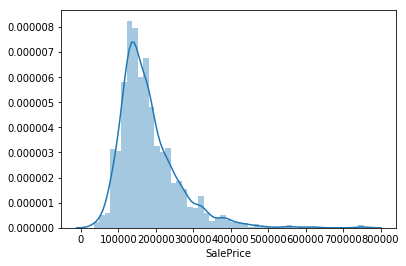

In [1635]:
import seaborn as sns
%matplotlib inline
sns.distplot(house_target)

In [1636]:
house_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Handling Missing Values

In [1637]:
# check for any NaN values in dataset
house_predictors.isnull().values.any()

True

In [1638]:
#assemble list of columns with missing values count > 0 (NaN)
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
print(missing_val_count_by_column, "out of total dataset length:", len(house_predictors))

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64 out of total dataset length: 2919


In [1639]:
# find columns with missing values and count how many
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_count_by_column = pd.DataFrame(missing_val_count_by_column)
#missing_val_count_by_column = missing_val_count_by_column.rename(columns={'0': 'Missing'}, inplace=True)
missing_val_count_by_column['Percentage'] = missing_val_count_by_column[0]/len(house_predictors)*100
missing_val_count_by_column.columns=['Missing Values', 'Percentage']
missing_val_count_by_column

,Missing Values,Percentage
MSZoning,4,0.137033
LotFrontage,486,16.649538
Alley,2721,93.216855
Utilities,2,0.068517
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
MasVnrType,24,0.822199
MasVnrArea,23,0.787941
BsmtQual,81,2.774923
BsmtCond,82,2.809181


In [1640]:
missing_val_count_by_column.T.columns
house_predictors[missing_val_count_by_column.T.columns].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


In [1641]:
#Removing features with too many missing values, with % thresold
remove_columns = missing_val_count_by_column[missing_val_count_by_column.Percentage > 50.0]
remove_columns.T


,Alley,PoolQC,Fence,MiscFeature
Missing Values,2721.000000,2909.000000,2348.000000,2814.000000
Percentage,93.216855,99.657417,80.438506,96.402878


In [1642]:
for cols in remove_columns.T.columns:
    #print(cols)
    house_predictors_shrunk = house_predictors.drop([cols], axis=1)
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal


### Identifying Categorical and Conditional variables

In [1643]:
#Removing as they break fit loop: 'OverallQual','BsmtCond', 'Electrical','SaleType'

cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig',
           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond',
            'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
             'ExterCond','Foundation','BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
             'HeatingQC','CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces',
             'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
             'MoSold', 'YrSold','SaleCondition','OverallQual','BsmtCond','SaleType']

#reducing number of categorical and cont for quick analysis
#cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','BsmtQual']

contin_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea']  #,'MiscVal'

#contin_vars = ['LotFrontage','LotArea', 'MasVnrArea']

house_target_desc = 'SalePrice'

In [1644]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual is Nan

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [1645]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,134.0,177.0,175.0,1494.0,520.0,832.0,426.0,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,1040.0,1175.0,912.0,1494.0,1253.0,832.0,1004.0,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,1040.0,1182.0,912.0,1494.0,1253.0,854.0,1004.0,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.0,752.0,0.0,0.0,1142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1646]:
### fill in missing values

In [1647]:
# are there any missing values in our categorical columns
house_predictors_shrunk[cat_vars].isnull().values.any()

True

In [1648]:
# are there any missing values in our continous columns
house_predictors_shrunk[contin_vars].isnull().values.any()

True

In [1649]:
# fill in unknown NaN values for selected cont columns with MEAN
for column in contin_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna(house_predictors_shrunk[column].mean()).astype('float32')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [1650]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,69.305794,51.0,50.0,70.0,85.0,69.305794,91.0,69.305794,51.0,69.305794,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,11200.0,11924.0,12968.000000,10652.0,10920.000000,6120.0,11241.000000,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.000000,0.0,0.0,0.0,286.0,0.000000,306.0,212.000000,0.0,180.000000,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.000000,0.0,851.0,906.0,998.0,737.000000,0.0,733.000000,0.0,578.000000,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.000000,952.0,140.0,134.0,177.0,175.000000,1494.0,520.000000,832.0,426.000000,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.000000,952.0,991.0,1040.0,1175.0,912.000000,1494.0,1253.000000,832.0,1004.000000,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.000000,1022.0,1077.0,1040.0,1182.0,912.000000,1494.0,1253.000000,854.0,1004.000000,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.000000,752.0,0.0,0.0,1142.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [1651]:
# fill in unknown NaN values for selected cont columns with "missing"
for column in cat_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna('missing').astype('object')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [1652]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual NaN is changed to 'missing'

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [1653]:
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0,12,2008,WD,Normal


In [1654]:
# Assemble dataset with only selected cont and cat columns
#house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars+[house_target_desc]].copy()
house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars].copy()
house_predictors_sml.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0


In [1655]:
pd.DataFrame(house_target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [1656]:
meanT = house_target.mean(axis=0)
stdT = house_target.std(axis=0)
meanT, stdT

(180921.19589041095, 79442.50288288663)

In [1657]:
meanTrain = house_predictors_sml[contin_vars].mean(axis=0)
stdTrain =  house_predictors_sml[contin_vars].std(axis=0)
meanTrain, stdTrain


(LotFrontage         69.306076
 LotArea          10168.111328
 MasVnrArea         102.201309
 BsmtFinSF1         441.423248
 BsmtFinSF2          49.582253
 BsmtUnfSF          560.772095
 TotalBsmtSF       1051.777588
 1stFlrSF          1159.581665
 2ndFlrSF           336.483734
 LowQualFinSF         4.694416
 GrLivArea         1500.759888
 GarageArea         472.874573
 WoodDeckSF          93.709831
 OpenPorchSF         47.486809
 EnclosedPorch       23.098322
 3SsnPorch            2.602261
 ScreenPorch         16.062349
 PoolArea             2.251799
 dtype: float32, LotFrontage        21.312389
 LotArea          7886.999512
 MasVnrArea        178.627304
 BsmtFinSF1        455.532593
 BsmtFinSF2        169.177002
 BsmtUnfSF         439.468414
 TotalBsmtSF       440.690918
 1stFlrSF          392.362274
 2ndFlrSF          428.698853
 LowQualFinSF       46.396454
 GrLivArea         506.051117
 GarageArea        215.357666
 WoodDeckSF        126.526474
 OpenPorchSF        67.575546
 Enclo

In [1658]:
#partition the Preprocessed Dataset Back into Train and Test Groups
# this will be used for model training and validation
train_processed = pd.concat([house_predictors_sml[:train_len]], axis=1)

# this will be used to generate the final submission
test_processed = house_predictors_sml[train_len:]

# confirm that the data looks correct
print(train_processed.shape)
print(test_processed.shape)
print(house_target.shape)

(1460, 73)
(1459, 73)
(1460,)


In [1659]:
# train_train, valid_train, train_test, valid_test = train_test_split(train_processed, house_target,
#                                                     train_size=0.95, random_state=42)
# train_processed.shape, train_train.shape, train_test.shape, valid_train.shape, valid_test.shape


In [1660]:
## Spliting dataset
from sklearn.model_selection import train_test_split

# split train dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(train_train, train_test,
#                                                     train_size=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_processed, house_target,
                                                    train_size=0.8, random_state=42)
X_train.shape, y_train.shape

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((1168, 73), (1168,))

In [1661]:
type(y_train)

pandas.core.series.Series

In [1662]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [1663]:
# #assign correct data types 
# for v in cat_vars:
#     X_train[v] = X_train[v].astype('category').cat.as_ordered()
#     X_test[v] = X_test[v].astype('category').cat.as_ordered()
#     test_processed[v] = test_processed[v].astype('category').cat.as_ordered()

    
for v in contin_vars:
    X_train[v] = X_train[v].astype('float32') 
    X_test[v] = X_test[v].astype('float32') 
    test_processed[v] = test_processed[v].astype('float32') 
    
house_target = house_target.astype('float32')  
y_train = y_train.astype('float32') 
y_test = y_test.astype('float32') 

#X_train[house_target_desc] = X_train[house_target_desc].astype('float32') 
    
house_predictors_sml.info()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
Id               2919 non-null object
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null object
YearRemodAdd     2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
ExterQual        2919 non-null object
ExterCond        29

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


## Scaling

In [1664]:
# Scale train data.
mean = X_train[contin_vars].mean(axis=0)
std = X_train[contin_vars].std(axis=0)
X_train[contin_vars] = ( X_train[contin_vars] - mean ) / std
X_train[contin_vars].head()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
254,-0.006716,-0.212805,-0.601229,1.036822,-0.285383,-0.400110,0.572367,0.374075,-0.801583,-0.118947,-0.406919,-0.863468,1.187891,-0.714047,-0.351769,-0.120956,-0.275719,-0.070962
1066,-0.496324,-0.265131,-0.601229,-0.971577,-0.285383,0.511700,-0.596291,-0.957792,0.954682,-0.118947,0.083135,-0.456069,-0.739839,-0.137956,-0.351769,-0.120956,-0.275719,-0.070962
638,-0.140246,-0.177765,-0.601229,-0.971577,-0.285383,0.504979,-0.603099,-0.965550,-0.801583,-0.118947,-1.394653,-2.256203,1.789343,-0.714047,2.289834,-0.120956,-0.275719,-0.070962
799,-0.451815,-0.324335,0.858911,0.267880,-0.285383,-0.915384,-0.750599,-0.487113,0.988807,-0.118947,0.458779,-1.119276,-0.739839,-0.714047,3.900567,-0.120956,-0.275719,-0.070962
380,-0.896913,-0.528808,-0.601229,-0.496706,-0.285383,0.531863,-0.081174,-0.370736,0.711262,-0.118947,0.311953,-0.797147,-0.739839,-0.714047,3.546206,-0.120956,-0.275719,-0.070962


In [1665]:
# Scale test data.
mean = X_test[contin_vars].mean(axis=0)
std = X_test[contin_vars].std(axis=0)
X_test[contin_vars] = ( X_test[contin_vars] - mean ) / std
X_test[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
892,0.050272,-0.239805,-0.492484,0.514779,-0.300767,-0.372331,0.043937,-0.175554,-0.767463,-0.124911,-0.757240,-0.873322,0.985425,-0.699038,-0.391863,-0.100213,-0.247133,-0.05852
1105,1.438158,0.412893,1.232851,1.344641,-0.300767,-0.289759,0.981207,0.944414,1.877512,-0.124911,2.186756,1.124832,0.928881,-0.059667,-0.391863,-0.100213,-0.247133,-0.05852
413,-0.643672,-0.147048,-0.492484,-0.976276,-0.300767,1.071489,-0.074382,-0.279255,-0.767463,-0.124911,-0.833019,-0.445146,-0.823990,-0.699038,1.880885,-0.100213,-0.247133,-0.05852
522,-0.941076,-0.819791,-0.492484,-0.078944,-0.300767,0.120738,-0.083662,-0.341475,0.788405,-0.124911,0.371860,-0.177536,-0.823990,-0.219510,0.237513,-0.100213,-0.247133,-0.05852
1036,0.992052,0.521959,-0.158855,1.322152,-0.300767,0.104224,1.345443,1.255516,-0.767463,-0.124911,0.288504,2.016865,1.324691,-0.699038,-0.391863,-0.100213,-0.247133,-0.05852


In [1666]:
# Scale final test processed data.
mean = test_processed[contin_vars].mean(axis=0)
std = test_processed[contin_vars].std(axis=0)
test_processed[contin_vars] = ( test_processed[contin_vars] - mean ) / std
test_processed[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
1460,0.549867,0.363804,-0.570000,0.063270,0.517185,-0.650406,-0.370690,-0.654337,-0.774987,-0.080456,-1.215171,1.185538,0.366551,-0.701390,-0.360617,-0.088796,1.818332,-0.057207
1461,0.598498,0.897553,0.041172,1.063026,-0.297790,-0.339272,0.638917,0.433149,-0.774987,-0.080456,-0.323429,-0.740959,2.347052,-0.178765,-0.360617,-0.088796,-0.301439,-0.057207
1462,0.258080,0.809368,-0.570000,0.772987,-0.297790,-0.954677,-0.266793,-0.573968,0.891637,-0.080456,0.294407,0.042545,0.930172,-0.207800,-0.360617,-0.088796,-0.301439,-0.057207
1463,0.452605,0.032053,-0.456820,0.357703,-0.297790,-0.526868,-0.271311,-0.578991,0.836955,-0.080456,0.242921,-0.012762,2.088726,-0.178765,-0.360617,-0.088796,-0.301439,-0.057207
1464,-1.249489,-0.971475,-0.570000,-0.387170,-0.297790,1.058544,0.528244,0.310085,-0.774987,-0.080456,-0.424342,0.153157,-0.729378,0.489032,-0.360617,-0.088796,2.242286,-0.057207


In [1667]:
#scale train and test target
# mean = y_train.mean(axis=0)
# std = y_train.std(axis=0)
y_train = ( y_train - meanT ) / stdT

# mean = y_test.mean(axis=0)
# std = y_test.std(axis=0)
y_test = ( y_test - meanT ) / stdT

In [1668]:
#Convert cat variables to one-hot-encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in cat_vars:
    label_encoders[cat_col] = LabelEncoder()
    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col].astype(str))
    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col].astype(str))
    test_processed[cat_col] = label_encoders[cat_col].fit_transform(test_processed[cat_col].astype(str))
#    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col])
#    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [1669]:
type(X_train), type(test_processed), type(X_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [1670]:
from torch.utils.data import Dataset, DataLoader
class TabularDataset(Dataset):
  def __init__(self, data,target_data, cat_cols=None):
    self.n = data.shape[0]

    self.y =  target_data.astype(np.float32).values

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                          if col not in self.cat_cols]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [1671]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):
    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [1672]:
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [1673]:
class MixedInputModel(nn.Module):
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops, y_range, use_bn=True):
        super().__init__()
        for i,(c,s) in enumerate(emb_szs): assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in self.embs: emb_init(emb)
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont=n_emb, n_cont
        
        szs = [n_emb+n_cont] + szs
        self.lins = nn.ModuleList([nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([nn.BatchNorm1d(sz) for sz in szs[1:]])
        for o in self.lins: nn.init.kaiming_normal_(o.weight.data)
        self.outp = nn.Linear(szs[-1], out_sz)
        nn.init.kaiming_normal_(self.outp.weight.data)

        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn,self.y_range = use_bn,y_range

    def forward(self, x_cat, x_cont):
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
            x = torch.cat(x, 1)
            x = self.emb_drop(x)
        if self.n_cont != 0:
            x2 = self.bn(x_cont)
            x = torch.cat([x, x2], 1) if self.n_emb != 0 else x2
        for l,d,b in zip(self.lins, self.drops, self.bns):
            x = F.relu(l(x))
            if self.use_bn: x = b(x)
            x = d(x)
        x = self.outp(x)
        if self.y_range:
            x = torch.sigmoid(x)
            x = x*(self.y_range[1] - self.y_range[0])
            x = x+self.y_range[0]
        return x.squeeze()

In [1674]:
#count unique values in test and train caterical
cat_dims_train=[int(X_train[col].nunique()) for col in cat_vars]
#cat_dims_test = [int(X_test[col].nunique()) for col in cat_vars]

cat_dims_trainFull = [[int(X_train[col].nunique()),col] for col in cat_vars]
cat_dims_trainFull

[[1168, 'Id'],
 [15, 'MSSubClass'],
 [5, 'MSZoning'],
 [2, 'Street'],
 [4, 'LotShape'],
 [4, 'LandContour'],
 [2, 'Utilities'],
 [5, 'LotConfig'],
 [3, 'LandSlope'],
 [25, 'Neighborhood'],
 [9, 'Condition1'],
 [8, 'Condition2'],
 [5, 'BldgType'],
 [8, 'HouseStyle'],
 [9, 'OverallCond'],
 [111, 'YearBuilt'],
 [61, 'YearRemodAdd'],
 [6, 'RoofStyle'],
 [7, 'RoofMatl'],
 [15, 'Exterior1st'],
 [16, 'Exterior2nd'],
 [5, 'MasVnrType'],
 [4, 'ExterQual'],
 [5, 'ExterCond'],
 [6, 'Foundation'],
 [5, 'BsmtQual'],
 [5, 'BsmtExposure'],
 [7, 'BsmtFinType1'],
 [7, 'BsmtFinType2'],
 [6, 'Heating'],
 [5, 'HeatingQC'],
 [2, 'CentralAir'],
 [4, 'BsmtFullBath'],
 [3, 'BsmtHalfBath'],
 [4, 'FullBath'],
 [3, 'HalfBath'],
 [8, 'BedroomAbvGr'],
 [4, 'KitchenAbvGr'],
 [4, 'KitchenQual'],
 [12, 'TotRmsAbvGrd'],
 [7, 'Functional'],
 [4, 'Fireplaces'],
 [7, 'GarageType'],
 [95, 'GarageYrBlt'],
 [4, 'GarageFinish'],
 [5, 'GarageCars'],
 [6, 'GarageQual'],
 [6, 'GarageCond'],
 [3, 'PavedDrive'],
 [12, 'MoSold'],


In [1675]:
# calculate embedding dimmenstions
emb_dims = [(x, min(50, (x + 4) // 2)) for x in cat_dims_train]

In [1676]:
# instantiating TabularDataset class

# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,

train_dataset = TabularDataset(data=X_train, target_data=y_train, cat_cols=cat_vars)
test_dataset = TabularDataset(data=X_test, target_data=y_test, cat_cols=cat_vars)

In [1677]:
batchsize = 32
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=4)

In [1678]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [1679]:
# y_range = (0, y_train.max()*1.2)
# y_range

In [1680]:
model = FeedForwardNN(emb_dims, no_of_cont=len(train_dataset.cont_cols), 
                      lin_layer_sizes=[600, 300],
                      output_size=1, emb_dropout=0.04,
                      lin_layer_dropouts=[0.001,0.01])



# model = MixedInputModel(emb_szs=emb_dims, 
#                     n_cont=len(train_dataset.cont_cols), 
#                     emb_drop=0.04, 
#                     out_sz=1, 
#                     szs=[1000,500,250], 
#                     drops=[0.001,0.01,0.01], 
#                     y_range=y_range)

model = model.to(device)
model

FeedForwardNN(
  (emb_layers): ModuleList(
    (0): Embedding(1168, 50)
    (1): Embedding(15, 9)
    (2): Embedding(5, 4)
    (3): Embedding(2, 3)
    (4): Embedding(4, 4)
    (5): Embedding(4, 4)
    (6): Embedding(2, 3)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(25, 14)
    (10): Embedding(9, 6)
    (11): Embedding(8, 6)
    (12): Embedding(5, 4)
    (13): Embedding(8, 6)
    (14): Embedding(9, 6)
    (15): Embedding(111, 50)
    (16): Embedding(61, 32)
    (17): Embedding(6, 5)
    (18): Embedding(7, 5)
    (19): Embedding(15, 9)
    (20): Embedding(16, 10)
    (21): Embedding(5, 4)
    (22): Embedding(4, 4)
    (23): Embedding(5, 4)
    (24): Embedding(6, 5)
    (25): Embedding(5, 4)
    (26): Embedding(5, 4)
    (27): Embedding(7, 5)
    (28): Embedding(7, 5)
    (29): Embedding(6, 5)
    (30): Embedding(5, 4)
    (31): Embedding(2, 3)
    (32): Embedding(4, 4)
    (33): Embedding(3, 3)
    (34): Embedding(4, 4)
    (35): Embedding(3, 3)
    (36): Embedd

In [1681]:
from collections import defaultdict
vloss = defaultdict(list)
tloss = defaultdict(list)

In [1682]:
no_of_epochs = 30
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [1683]:
from sklearn.metrics import mean_squared_error

def inv_y(y): return np.exp(y)

def rmse(targ, y_pred):
    return np.sqrt(mean_squared_error(inv_y(y_pred), inv_y(targ))) #.detach().numpy()

In [1684]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1e20
train_losses, test_losses = [],[]
train_rmse, test_rmse = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    y_true_train = list()
    y_pred_train = list()
    total_loss_train = 0   
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in train_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        tloss[i].append(loss.item())
        #loss2 = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
        #print(loss.item(), loss2.item())
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        #running_loss += loss.item()  
        
        y_true_train += list(y.data.numpy())
        y_pred_train += list(preds.data.numpy())
        total_loss_train += loss.item()
        
        #running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
    train_acc = rmse(y_true_train, y_pred_train)
    train_loss = total_loss_train/len(train_dataset)
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    y_true_val = list()
    y_pred_val = list()
    total_loss_val = 0
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        #print("1",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #print("2",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #test_loss = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #test_loss += torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #print(test_loss)
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        y_true_val += list(y.data.numpy())
        y_pred_val += list(preds.data.numpy())
        total_loss_val += loss.item()
        vloss[i].append(loss.item())
                
        #running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=   
        #print("batch:",cat_x.size(0))
    
    epoch_train_loss = running_loss / len(train_dataset)
    #epoch_train_loss = running_loss / cat_x.size(0)
    #epoch_train_acc = running_train_corrects / len(train_dataset)
    
    #epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    #epoch_test_loss = test_loss
    
    valacc = rmse(y_true_val, y_pred_val)
    valloss = total_loss_val/len(test_dataset)
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    train_rmse.append(train_acc)
    test_rmse.append(valacc)
    
    
#    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
#     print('Epoch {}/{}, Train Loss: {:.6f}, Test Loss: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_test_loss))
    print(f'Epoch {epoch}/{no_of_epochs-1}, TrainMSE: {epoch_train_loss:.4f}, TestMSE: {epoch_test_loss:.4f}, train_loss:{train_loss:.4f}, train_rmse:{train_acc:.4f}, val_loss:{valloss:.4f},val_rmse:{valacc:.4f}')
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

Epoch 0/29, TrainMSE: 1.5681, TestMSE: 1.3130, train_loss:0.0494, train_rmse:42.4420, val_loss:0.0447,val_rmse:81.7922
Epoch 1/29, TrainMSE: 0.9668, TestMSE: 1.2272, train_loss:0.0305, train_rmse:37.0193, val_loss:0.0438,val_rmse:81.8132
Epoch 2/29, TrainMSE: 0.9523, TestMSE: 1.2616, train_loss:0.0300, train_rmse:37.0257, val_loss:0.0514,val_rmse:81.6515
Epoch 3/29, TrainMSE: 0.9486, TestMSE: 1.2844, train_loss:0.0300, train_rmse:37.0264, val_loss:0.0427,val_rmse:81.7569
Epoch 4/29, TrainMSE: 0.9492, TestMSE: 1.2431, train_loss:0.0301, train_rmse:37.0241, val_loss:0.0403,val_rmse:81.7485
Epoch 5/29, TrainMSE: 0.9478, TestMSE: 1.2451, train_loss:0.0299, train_rmse:37.0264, val_loss:0.0401,val_rmse:81.8509
Epoch 6/29, TrainMSE: 0.9468, TestMSE: 1.2308, train_loss:0.0304, train_rmse:37.0261, val_loss:0.0415,val_rmse:81.8330
Epoch 7/29, TrainMSE: 0.9467, TestMSE: 1.2311, train_loss:0.0305, train_rmse:37.0257, val_loss:0.0397,val_rmse:81.8603
Epoch 8/29, TrainMSE: 0.9466, TestMSE: 1.2264, t

In [1685]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1686]:
# t = [np.mean(tloss[el]) for el in tloss]
# v = [np.mean(vloss[el]) for el in vloss]

# plt.plot(t,label = "Train losses")
# plt.plot(v, label = "Test losses")
# plt.legend()

# p = pd.DataFrame({'Train Loss': t, 'Validation Loss': v, 'Epochs': range(40)})


# _ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
#            title='Train and Validation Loss over Epochs')

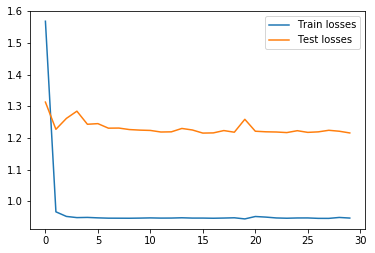

In [1687]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

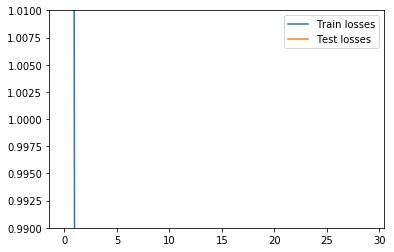

In [1688]:
 plt.ylim(bottom=0.99,top=1.01)
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

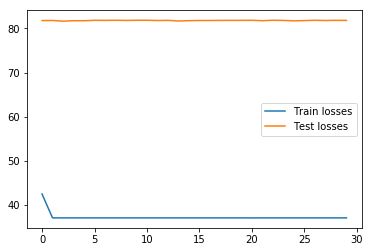

In [1689]:
# plt.ylim(bottom=0.6e10,top=0.75e10)
#lt.ylim(bottom=0.997,top=1.007)
plt.plot(train_rmse,label = "Train losses")
plt.plot(test_rmse, label = "Test losses")
plt.legend()

In [1690]:
test_processed.shape, type(test_processed)

((1459, 73), pandas.core.frame.DataFrame)

In [1691]:
cont_Y = torch.from_numpy(test_processed[contin_vars].astype(np.float32).values).to(device)
cat_Y = torch.from_numpy(test_processed[cat_vars].astype(np.int64).values).to(device)

In [1692]:
len(cont_Y), len(cat_Y), cont_Y[[0]].shape

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(1459, 1459, torch.Size([1, 18]))

In [1693]:
model.eval()
model = model.to(device)
for i in range(0,len(cont_Y)):
#     cat_data.to(device)
#     cont_data.to(device)
    with torch.no_grad():
        print(cont_Y[[i]])
        print(cat_Y[[i]])
        output = model.forward(cont_Y[[i]],cat_Y[[i]])
        #output.to(device)
        print(i, output)
        print(type(output))

tensor([[ 0.5499,  0.3638, -0.5700,  0.0633,  0.5172, -0.6504, -0.3707, -0.6543,
         -0.7750, -0.0805, -1.2152,  1.1855,  0.3666, -0.7014, -0.3606, -0.0888,
          1.8183, -0.0572]])
tensor([[ 0,  5,  2,  1,  3,  3,  0,  4,  0, 12,  1,  2,  0,  2,  5, 56, 11,  1,
          0, 10, 12,  2,  3,  4,  1,  3,  3,  4,  3,  0,  4,  1,  0,  0,  1,  0,
          2,  1,  3,  7,  6,  0,  1, 46,  2,  1,  3,  4,  2,  8,  4,  4,  5,  3,
          8]])
0 tensor([[0.0204]])
<class 'torch.Tensor'>
tensor([[ 0.5985,  0.8976,  0.0412,  1.0630, -0.2978, -0.3393,  0.6389,  0.4331,
         -0.7750, -0.0805, -0.3234, -0.7410,  2.3471, -0.1788, -0.3606, -0.0888,
         -0.3014, -0.0572]])
tensor([[ 1,  5,  3,  1,  0,  3,  0,  0,  0, 12,  2,  2,  0,  2,  5, 53,  8,  3,
          0, 11, 13,  1,  3,  4,  1,  3,  3,  0,  5,  0,  4,  1,  0,  0,  1,  1,
          3,  1,  2,  8,  6,  0,  1, 43,  2,  1,  3,  4,  2,  8,  4,  4,  6,  3,
          8]])
1 tensor([[0.0008]])
<class 'torch.Tensor'>
tensor([[ 0.25

RuntimeError: index out of range at /opt/conda/conda-bld/pytorch-cpu_1544218667092/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:191

In [ ]:
cont_loader=torch.utils.data.DataLoader(cont_Y, batch_size=1, shuffle=False, num_workers=1)
cat_loader=torch.utils.data.DataLoader(cat_Y, batch_size=1, shuffle=False, num_workers=1)

In [ ]:
i=0
prices = []
for  cat_data, cont_data in zip(cat_loader,cont_loader):
    i+=1
    cat_data.to(device)
    cont_data.to(device)
    print(cont_data.shape, cat_data.shape)
    print(cont_data)
    model.eval()
    model = model.to(device)
    with torch.no_grad():
        output = model.forward(cont_data,cat_data)
        #output.to(device)
        print(output)
        print(i,type(output))
        prices.append(output.numpy()[0][0])

In [ ]:
prices

In [ ]:
stdT, meanT

In [ ]:
ScaledPrices = pd.DataFrame(prices) * stdT + meanT
ScaledPrices

In [ ]:
ScaledPrices = pd.DataFrame(prices)
ScaledPrices

In [ ]:
with torch.no_grad():
    model.eval()
    output = model.forward(cont_Y,cat_Y)

output.shape

In [ ]:
output

In [ ]:
stdT,meanT

In [ ]:
out=output.numpy()

In [ ]:
out2 = out * stdT + meanT
out2

In [ ]:
out2.shape

In [ ]:
type(test_processed.Id)

In [ ]:
output3 = pd.DataFrame({'Id': test_processed.Id[1:32].index,
                       'SalePrice': out2.flatten()})

In [ ]:
output3

In [ ]:
output3.to_csv('submission.csv', index=False)